In [1]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

## The second sub-question
*How much do the suicide rates differ among racial demographics (White, Black, and Hispanic) when faced with higher unemployment rates?*

In [48]:
file1 = 'Death_rates_for_suicide_by_sex_race_age_United_States.csv'
file2 = 'EPI Data Library - Unemployment.csv'

In [50]:
death_data = pd.read_csv(file1)
unemployment_data = pd.read_csv(file2)

In [52]:
unemployment_data

,Date,All,Women,Men,Black,Hispanic,White,Black Women,Black Men,Hispanic Women,...,White Women 55-64,White Women 65+,White Men 16-24,White Men 25-54,White Men 55-64,White Men 65+,16-24,25-54,55-64,65+
0,Dec-2024,4.0%,3.9%,4.1%,6.2%,5.1%,3.2%,5.8%,6.7%,5.4%,...,2.0%,2.7%,7.8%,2.9%,2.5%,2.8%,8.9%,3.4%,2.8%,3.1%
1,Nov-2024,4.0%,3.9%,4.1%,6.1%,5.0%,3.2%,5.7%,6.6%,5.3%,...,2.0%,2.7%,7.7%,2.9%,2.5%,2.7%,8.9%,3.4%,2.8%,3.1%
2,Oct-2024,4.0%,3.8%,4.1%,6.1%,5.0%,3.1%,5.6%,6.6%,5.2%,...,2.0%,2.6%,7.5%,2.8%,2.6%,2.7%,8.7%,3.4%,2.8%,3.1%
3,Sep-2024,3.9%,3.8%,4.1%,6.1%,5.0%,3.1%,5.7%,6.6%,5.1%,...,2.1%,2.7%,7.5%,2.8%,2.5%,2.7%,8.7%,3.3%,2.8%,3.1%
4,Aug-2024,3.9%,3.7%,4.1%,6.1%,4.9%,3.1%,5.6%,6.6%,5.0%,...,2.2%,2.6%,7.5%,2.8%,2.5%,2.7%,8.6%,3.3%,2.7%,3.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Apr-1979,5.9%,7.1%,5.1%,12.7%,8.8%,4.9%,14.0%,11.4%,11.0%,...,2.9%,3.3%,9.4%,2.8%,2.3%,3.5%,11.9%,4.2%,2.8%,3.7%
549,Mar-1979,6.0%,7.2%,5.1%,12.7%,8.9%,5.0%,14.0%,11.6%,11.2%,...,2.9%,3.4%,9.4%,2.8%,2.4%,3.5%,12.0%,4.3%,2.8%,3.8%
550,Feb-1979,6.0%,7.2%,5.2%,12.8%,9.0%,5.0%,14.1%,11.6%,11.4%,...,2.9%,3.4%,9.6%,2.8%,2.4%,3.5%,12.2%,4.3%,2.8%,3.8%
551,Jan-1979,6.1%,7.2%,5.2%,12.8%,9.2%,5.0%,14.1%,11.6%,11.5%,...,2.9%,3.2%,9.7%,2.9%,2.5%,3.5%,12.3%,4.3%,2.9%,3.7%


In [6]:
unemployment_data = unemployment_data[['Date', 'All', 'Black', 'White', 'Hispanic']]

*Delete the moth and day from the date and create another column called 'year' to make the following calculation easly*

In [7]:
new_unemployment_data = unemployment_data[['Date', 'All', 'Black', 'White', 'Hispanic']].copy()
new_unemployment_data['Date'] = pd.to_datetime(new_unemployment_data['Date'], format='%b-%Y')
new_unemployment_data['Year'] = new_unemployment_data['Date'].dt.year
new_unemployment_data

,Date,All,Black,White,Hispanic,Year
0,2024-12-01,4.0%,6.2%,3.2%,5.1%,2024
1,2024-11-01,4.0%,6.1%,3.2%,5.0%,2024
2,2024-10-01,4.0%,6.1%,3.1%,5.0%,2024
3,2024-09-01,3.9%,6.1%,3.1%,5.0%,2024
4,2024-08-01,3.9%,6.1%,3.1%,4.9%,2024
...,...,...,...,...,...,...
548,1979-04-01,5.9%,12.7%,4.9%,8.8%,1979
549,1979-03-01,6.0%,12.7%,5.0%,8.9%,1979
550,1979-02-01,6.0%,12.8%,5.0%,9.0%,1979
551,1979-01-01,6.1%,12.8%,5.0%,9.2%,1979


*Delete the '%' char from the data frame to make the following calculations easly*

In [8]:
for col in new_unemployment_data.columns:
    if new_unemployment_data[col].dtype == 'object':  
        new_unemployment_data[col] = new_unemployment_data[col].str.rstrip('%').astype(float)

*Creating a new column which includes the mean of all races in the data*

In [9]:
new_unemployment_data[['Year', 'All', 'Black', 'White', 'Hispanic']]
new_unemployment_data['All_demographics'] = new_unemployment_data[['Black', 'White', 'Hispanic']].mean(axis=1)
new_unemployment_data

,Date,All,Black,White,Hispanic,Year,All_demographics
0,2024-12-01,4.0,6.2,3.2,5.1,2024,4.833333
1,2024-11-01,4.0,6.1,3.2,5.0,2024,4.766667
2,2024-10-01,4.0,6.1,3.1,5.0,2024,4.733333
3,2024-09-01,3.9,6.1,3.1,5.0,2024,4.733333
4,2024-08-01,3.9,6.1,3.1,4.9,2024,4.700000
...,...,...,...,...,...,...,...
548,1979-04-01,5.9,12.7,4.9,8.8,1979,8.800000
549,1979-03-01,6.0,12.7,5.0,8.9,1979,8.866667
550,1979-02-01,6.0,12.8,5.0,9.0,1979,8.933333
551,1979-01-01,6.1,12.8,5.0,9.2,1979,9.000000


In [61]:
final_new_data = new_unemployment_data[['Year','All_demographics', 'Black', 'White', 'Hispanic']].copy()

*Making the data frame shorter by taking the avg. of every year*

In [68]:
final_new_data = final_new_data.groupby('Year').mean()
final_new_data.reset_index(inplace=True)

*Substituting the years which are not compatible with other data sets*

In [70]:
final_new_data = final_new_data[final_new_data['Year'] >= 1980]
final_new_data = final_new_data.loc[final_new_data['Year'] <= 2018]
final_new_data

,Year,All_demographics,Black,White,Hispanic
0,1980,9.397222,13.283333,5.516667,9.391667
1,1981,10.736111,15.325000,6.391667,10.491667
2,1982,12.308333,17.533333,7.366667,12.025000
3,1983,14.322222,20.033333,8.508333,14.425000
4,1984,12.094444,17.575000,6.891667,11.816667
...,...,...,...,...,...
34,2014,8.619444,12.233333,5.366667,8.258333
35,2015,7.283333,10.508333,4.466667,6.875000
36,2016,6.377778,9.016667,4.025000,6.091667
37,2017,5.744444,7.958333,3.766667,5.508333


*Saving the clean data to computer*

In [13]:
# final_new_data.to_csv(r'C:\Users\User\Desktop\bet startUp\final_data_23_24.csv', index=False)
# final_new_data.to_csv(r'C:\Users\User\Desktop\vrije\3. year\3. period\Data Wrangling\final proje\Our_final_data', index=False)
# final_new_data.to_csv(r'C:\Users\User\Desktop\final_data.csv', index=False)


*Making bar plot with the final data set and download it to computer*

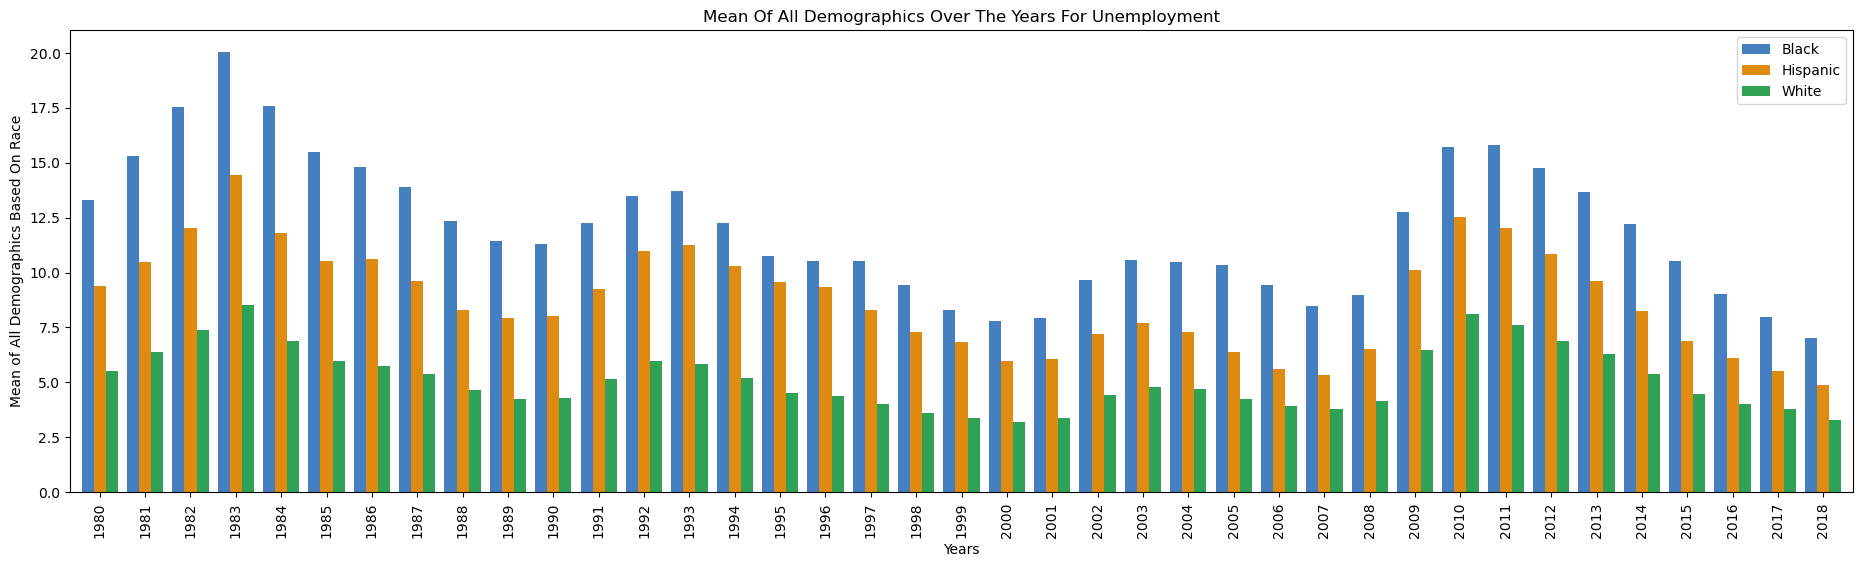

In [97]:
final_new_data.plot(kind='bar', x='Year', y=['Black', 'Hispanic', 'White'], figsize=(23,6), rot=90, width=0.8, color=['#457fc0', '#df8a10', '#2fa256'])
plt.xlabel('Years')
plt.ylabel('Mean of All Demographics Based On Race')
plt.title('Mean Of All Demographics Over The Years For Unemployment')
# plt.savefig("plot.png", dpi=300, bbox_inches="tight") #to save the png file to computer

plt.show()


## Second data (Deadth) ##

In [100]:
death_data

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.000,1981,5,All ages,0.0,12.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Not Hispanic or Latino: Black or Afric...,7.225,2018,42,65 years and over,5.0,1.3,NaN
6386,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 15-24 y...,7.232,2018,42,15-24 years,2.0,4.1,NaN
6387,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 25-44 y...,7.233,2018,42,25-44 years,3.0,4.4,NaN
6388,Death rates for suicide,"Deaths per 100,000 resident population, crude",2,"Sex, age and race and Hispanic origin (Single ...",11,Female: Hispanic or Latino: All races: 45-64 y...,7.234,2018,42,45-64 years,4.0,3.2,NaN


*To choose usable rows from the data set, I used unique to see all rows*

In [103]:
death_data['STUB_LABEL'].unique()

array(['All persons', 'Male', 'Female', 'Male: White',
       'Male: Black or African American',
       'Male: American Indian or Alaska Native',
       'Male: Asian or Pacific Islander', 'Female: White',
       'Female: Black or African American',
       'Female: American Indian or Alaska Native',
       'Female: Asian or Pacific Islander',
       'Male: Not Hispanic or Latino: White',
       'Male: Not Hispanic or Latino: Black or African American',
       'Male: Hispanic or Latino: All races',
       'Male: Not Hispanic or Latino: American Indian or Alaska Native',
       'Male: Not Hispanic or Latino: Asian or Pacific Islander',
       'Female: Not Hispanic or Latino: White',
       'Female: Not Hispanic or Latino: Black or African American',
       'Female: Hispanic or Latino: All races',
       'Female: Not Hispanic or Latino: American Indian or Alaska Native',
       'Female: Not Hispanic or Latino: Asian or Pacific Islander',
       'Male: Not Hispanic or Latino: Asian',
      

In [105]:
death_data_new = death_data[['YEAR', 'STUB_LABEL', 'ESTIMATE']]
death_data_new

,YEAR,STUB_LABEL,ESTIMATE
0,1950,All persons,13.2
1,1960,All persons,12.5
2,1970,All persons,13.1
3,1980,All persons,12.2
4,1981,All persons,12.3
...,...,...,...
6385,2018,Female: Not Hispanic or Latino: Black or Afric...,1.3
6386,2018,Female: Hispanic or Latino: All races: 15-24 y...,4.1
6387,2018,Female: Hispanic or Latino: All races: 25-44 y...,4.4
6388,2018,Female: Hispanic or Latino: All races: 45-64 y...,3.2


*Creating a data frame that only includes necessary rows from data* 

*Substituting the data after the year 1980 to make the data compatible with other data sets*

In [108]:
selected_labels = [
    'Male: White', 
    'Male: Black or African American', 
    'Male: Hispanic or Latino: All races', 
    'Female: White',  
    'Female: Black or African American', 
    'Female: Hispanic or Latino: All races'
]

death_data_new = death_data_new[death_data_new['STUB_LABEL'].isin(selected_labels)]
death_data_new = death_data_new[death_data_new['YEAR'] >= 1980]
death_data_new = death_data_new.sort_values(by=['YEAR', 'STUB_LABEL'])

death_data_new

,YEAR,STUB_LABEL,ESTIMATE
339,1980,Female: Black or African American,2.4
2915,1980,Female: Black or African American,2.2
716,1980,Female: Hispanic or Latino: All races,NaN
4887,1980,Female: Hispanic or Latino: All races,NaN
297,1980,Female: White,6.1
...,...,...,...
6332,2018,Male: Hispanic or Latino: All races,11.5
167,2018,Male: White,25.5
796,2018,Male: White,25.6
2743,2018,Male: White,26.6


*Save the clean data set to the computer*

In [111]:
# death_data_new.to_csv(r'C:\Users\User\Desktop\final_data_death2.csv', index=False)

*Using map to collect different rows into one row under the new column called 'GROUPED_LABEL', then using groupby to calculate the mean estimate for each group by years.*

In [117]:
mapping = {
    'Male: White': 'White',
    'Female: White': 'White',
    'Male: Black or African American': 'Black',
    'Female: Black or African American': 'Black',
    'Male: Hispanic or Latino: All races': 'Hispanic',
    'Female: Hispanic or Latino: All races': 'Hispanic'
}

death_data_new['GROUPED_LABEL'] = death_data_new['STUB_LABEL'].map(mapping)
death_data_grouped = death_data_new.groupby(['YEAR', 'GROUPED_LABEL'], as_index=False)['ESTIMATE'].mean()
death_data_grouped


,YEAR,GROUPED_LABEL,ESTIMATE
0,1980,Black,6.5750
1,1980,Hispanic,NaN
2,1980,White,13.2000
3,1981,Black,6.6500
4,1981,Hispanic,NaN
...,...,...,...
112,2017,Hispanic,6.7750
113,2017,White,16.3000
114,2018,Black,7.2500
115,2018,Hispanic,7.3000


*Creating a new data set that races as columns and creating a new column called 'All_demographics_sui' which includes the means*

In [120]:
death_data_pivot = death_data_grouped.pivot(index='YEAR', columns='GROUPED_LABEL', values='ESTIMATE')
death_data_pivot['All_demographics_sui'] = death_data_pivot.mean(axis=1)
death_data_grouped_new = death_data_pivot.reset_index()

death_data_grouped_new


GROUPED_LABEL,YEAR,Black,Hispanic,White,All_demographics_sui
0,1980,6.575,NaN,13.2000,9.887500
1,1981,6.650,NaN,13.3750,10.012500
2,1982,6.475,NaN,13.6500,10.062500
3,1983,6.350,NaN,13.5500,9.950000
4,1984,6.725,NaN,13.8500,10.287500
...,...,...,...,...,...
34,2014,5.725,6.100,15.2500,9.025000
35,2015,5.775,6.025,15.5750,9.125000
36,2016,6.275,6.525,15.7000,9.500000
37,2017,6.850,6.775,16.3000,9.975000


*Using pivot table to readjust numerical values and adding the estimates for each group. Also creating a bar plot with bars*

*Also download the png file to the computer*

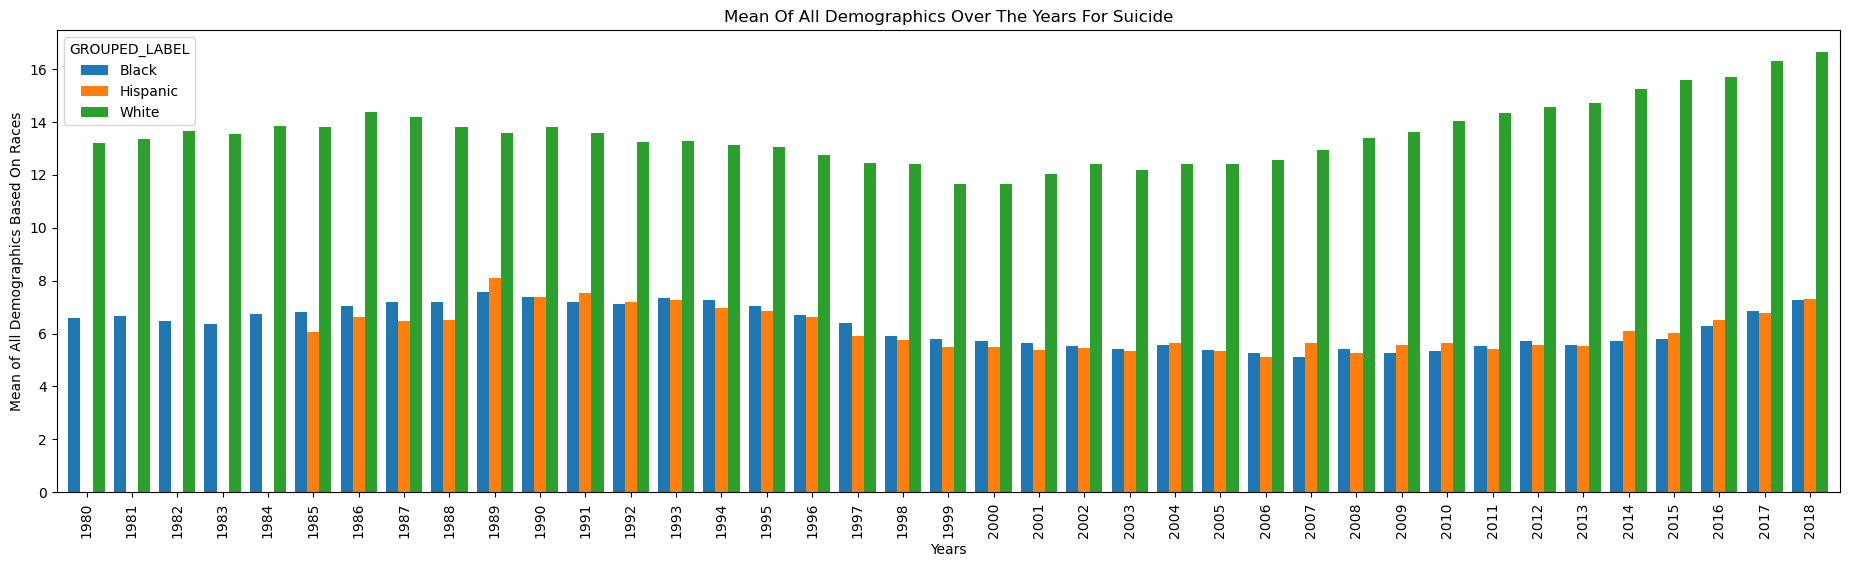

In [125]:
death_data_pivot = death_data_grouped.pivot_table(index='YEAR', columns='GROUPED_LABEL', values='ESTIMATE', aggfunc='sum')
death_data_pivot.plot(kind='bar', figsize=(23,6), rot=90, width=0.8)
plt.xlabel('Years')
plt.ylabel('Mean of All Demographics Based On Races')
plt.title('Mean Of All Demographics Over The Years For Suicide')
# plt.savefig("plot.png", dpi=300, bbox_inches="tight")

plt.show()